In [23]:
import numpy as np 
import os
import pandas as pd 
import matplotlib.pyplot as plt 

#Importation des bibliothèques pour de la modélisation 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

 
import kagglehub

import seaborn as sns
from scipy.stats import linregress



In [2]:
# Download the dataset and get the path to the directory
data_dir = kagglehub.dataset_download("purohitgaurav/plastic-based-textiles-in-clothing-industry")

# List the files in the downloaded directory to ensure the correct path
print("Downloaded files:", os.listdir(data_dir))

# Adjust this based on the actual filename inside the directory
csv_file = "Plastic based Textiles in clothing industry.csv"
file_path = os.path.join(data_dir, csv_file)

Downloaded files: ['Plastic based Textiles in clothing industry.csv']


In [3]:
## Premières esquisses
df = pd.read_csv(file_path)
df.shape
df.columns
df.head()
df.dropna()
df.reset_index(drop=True, inplace=True)  # Réinitialise l'index à 0
df.index = df.index + 1 
df.head()

,Company,Product_Type,Production_Year,Greenhouse_Gas_Emissions,Pollutants_Emitted,Water_Consumption,Energy_Consumption,Waste_Generation,Sales_Revenue
1,Zara,Polyester,2020,5000,20,7500,1200,300,500000
2,Zara,Nylon,2019,3000,15,5000,900,200,450000
3,Zara,Recycled_Poly,2021,3500,18,6000,1100,250,480000
4,Zara,Cotton,2018,2000,10,4500,800,180,550000
5,Zara,Synthetic_Blend,2022,6000,25,8000,1500,350,600000


In [4]:
# Conversion des années en format "DateTime" + réorganisation du df
df['Production_Year'] = pd.to_datetime(df['Production_Year'], format='%Y')
df.head()
df_sorted = df.sort_values(by='Production_Year')
df_sorted.head()

,Company,Product_Type,Production_Year,Greenhouse_Gas_Emissions,Pollutants_Emitted,Water_Consumption,Energy_Consumption,Waste_Generation,Sales_Revenue
5228,Adidas,Recycled_Poly,2018-01-01,3273,25,7924,1387,290,438933
4711,Adidas,Cotton,2018-01-01,4834,11,4076,1404,322,576852
2724,Forever 21,Microfiber,2018-01-01,4476,14,4484,732,191,524456
2725,Adidas,Linen,2018-01-01,5049,21,5187,1266,304,436044
998,Nike,Tencel,2018-01-01,3994,22,7641,1184,179,549705


In [5]:
#Obtention des premières statistiques 

stat = df_sorted.describe()
stat #valeurs élementaires 


,Production_Year,Greenhouse_Gas_Emissions,Pollutants_Emitted,Water_Consumption,Energy_Consumption,Waste_Generation,Sales_Revenue
count,6956,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000,6956.000000
mean,2020-01-01 19:43:30.465785088,3891.252300,16.992812,5983.972542,1106.555204,248.891748,510234.839275
min,2018-01-01 00:00:00,1800.000000,9.000000,4000.000000,700.000000,150.000000,420000.000000
25%,2019-01-01 00:00:00,2837.750000,13.000000,5005.000000,906.000000,198.000000,465467.750000
50%,2020-01-01 00:00:00,3876.500000,17.000000,5943.000000,1112.000000,249.000000,510494.000000
75%,2021-01-01 00:00:00,4968.000000,21.000000,6991.250000,1308.000000,299.000000,555122.750000
max,2022-01-01 00:00:00,6000.000000,25.000000,8000.000000,1500.000000,350.000000,600000.000000
std,NaN,1219.957903,4.913978,1153.555849,232.108015,57.751230,51775.324086


In [6]:
mediane = df_sorted.select_dtypes(include=['number']).median()
mediane #obtention des médianes des différentes valeurs numériques du df

Greenhouse_Gas_Emissions      3876.5
Pollutants_Emitted              17.0
Water_Consumption             5943.0
Energy_Consumption            1112.0
Waste_Generation               249.0
Sales_Revenue               510494.0
dtype: float64

In [7]:
### Visualisation prmimaire

# Supprimer les lignes contenant 2019.5 dans Production_Year
df_sorted = df_sorted[df_sorted['Production_Year'] != '2019.5']

# Vérification des données après la suppression
print(df_sorted.head())

         Company   Product_Type Production_Year  Greenhouse_Gas_Emissions  \
5228      Adidas  Recycled_Poly      2018-01-01                      3273   
4711      Adidas         Cotton      2018-01-01                      4834   
2724  Forever 21     Microfiber      2018-01-01                      4476   
2725      Adidas          Linen      2018-01-01                      5049   
998         Nike         Tencel      2018-01-01                      3994   

      Pollutants_Emitted  Water_Consumption  Energy_Consumption  \
5228                  25               7924                1387   
4711                  11               4076                1404   
2724                  14               4484                 732   
2725                  21               5187                1266   
998                   22               7641                1184   

      Waste_Generation  Sales_Revenue  
5228               290         438933  
4711               322         576852  
2724          

In [8]:
# Liste des colonnes numériques
numeric_columns = ['Greenhouse_Gas_Emissions', 'Pollutants_Emitted', 'Water_Consumption', 
                   'Energy_Consumption', 'Waste_Generation', 'Sales_Revenue']

In [9]:
# Fonction pour tracer des histogrammes comparant les entreprises
def plot_comparative_histograms(df, time_column, company_column, numeric_columns):
    # Obtenir les entreprises uniques
    companies = df_sorted[company_column].unique()

    # Tracer des histogrammes pour chaque colonne numérique
    for col in numeric_columns:
        plt.figure(figsize=(12, 6))
        
        # Créer un histogramme pour chaque entreprise
        for company in companies:
            # Filtrer les données pour l'entreprise
            company_data = df_sorted[df_sorted[company_column] == company]
            plt.hist(company_data[time_column].dt.year, 
                     weights=company_data[col], 
                     bins=10, 
                     alpha=0.5,  # Translucide pour superposition
                     label=company)

        plt.title(f'Comparaison de {col} par année')
        plt.xlabel('Année')
        plt.ylabel(f'{col}')
        plt.legend(title='Entreprises')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


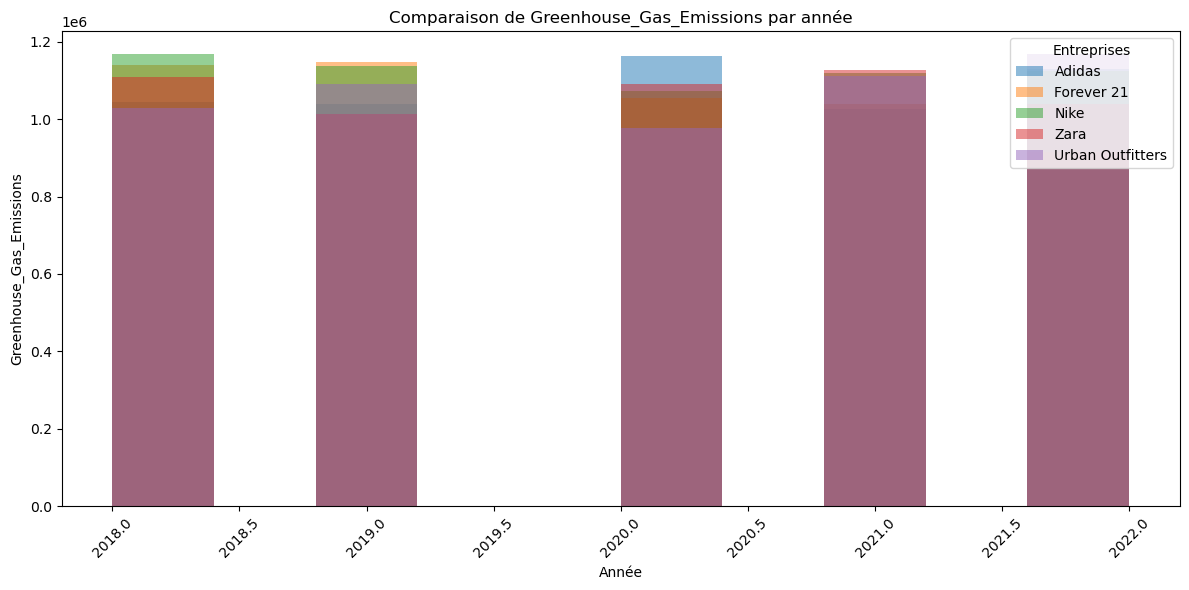

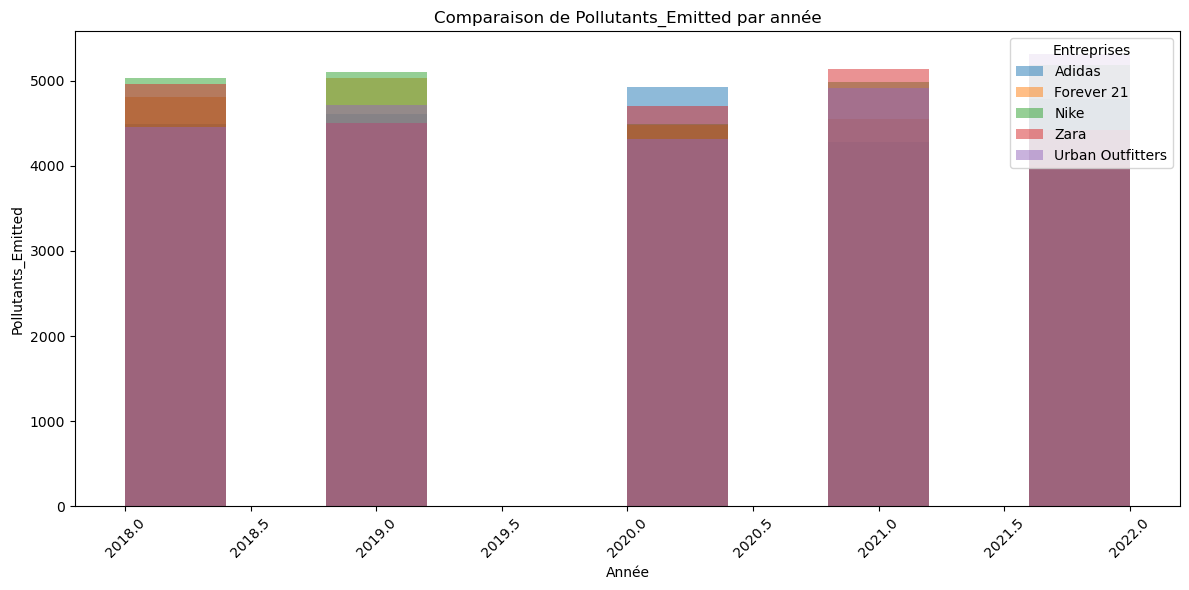

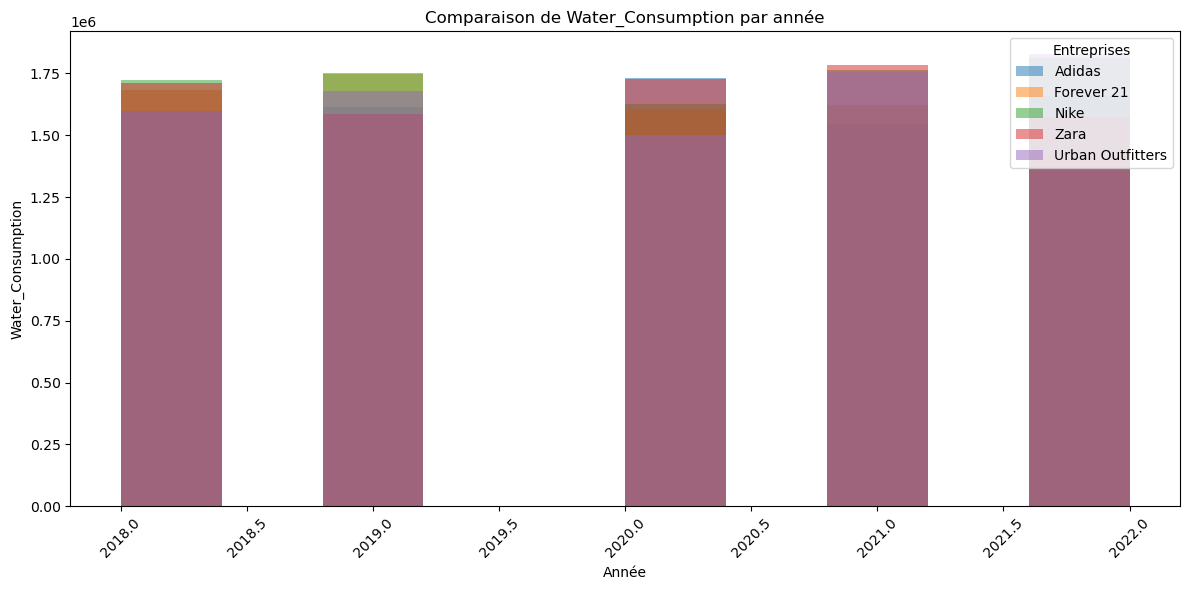

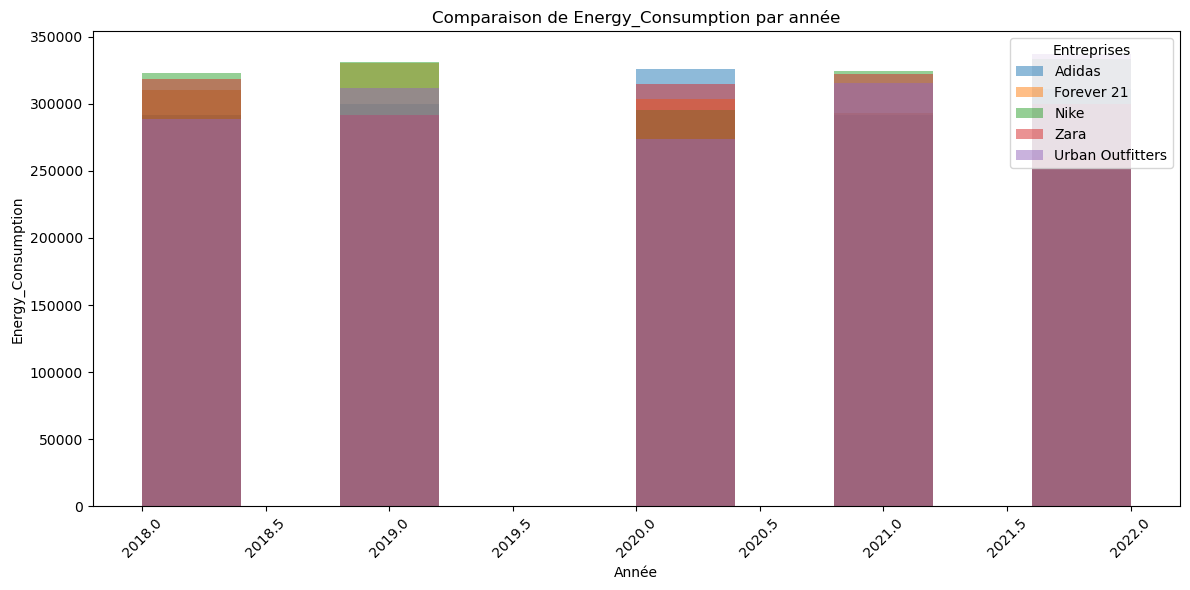

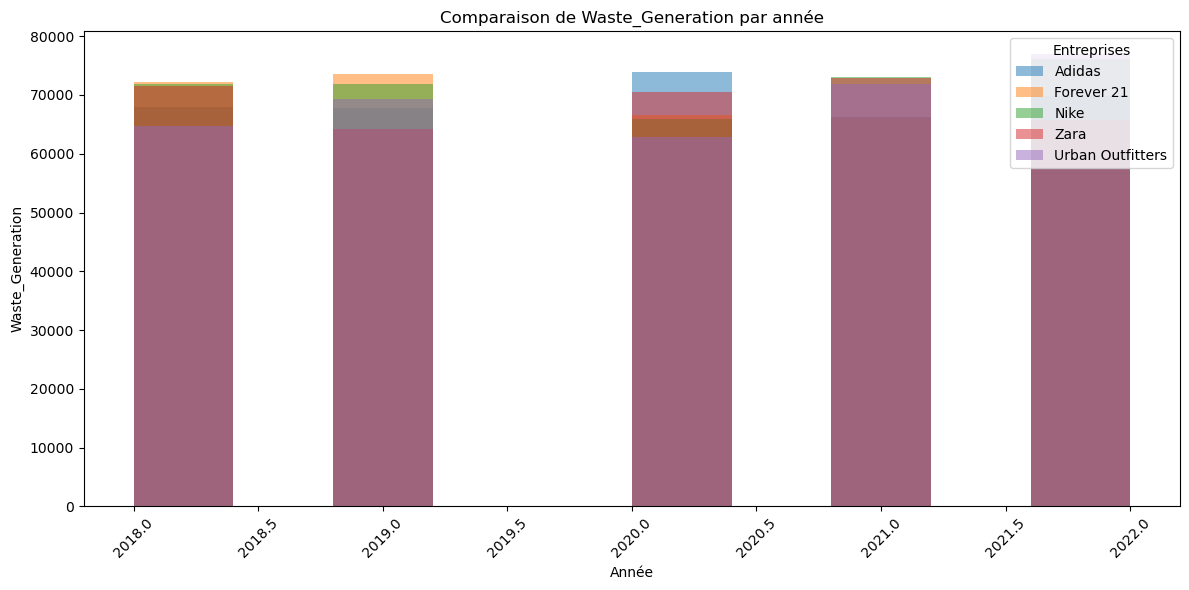

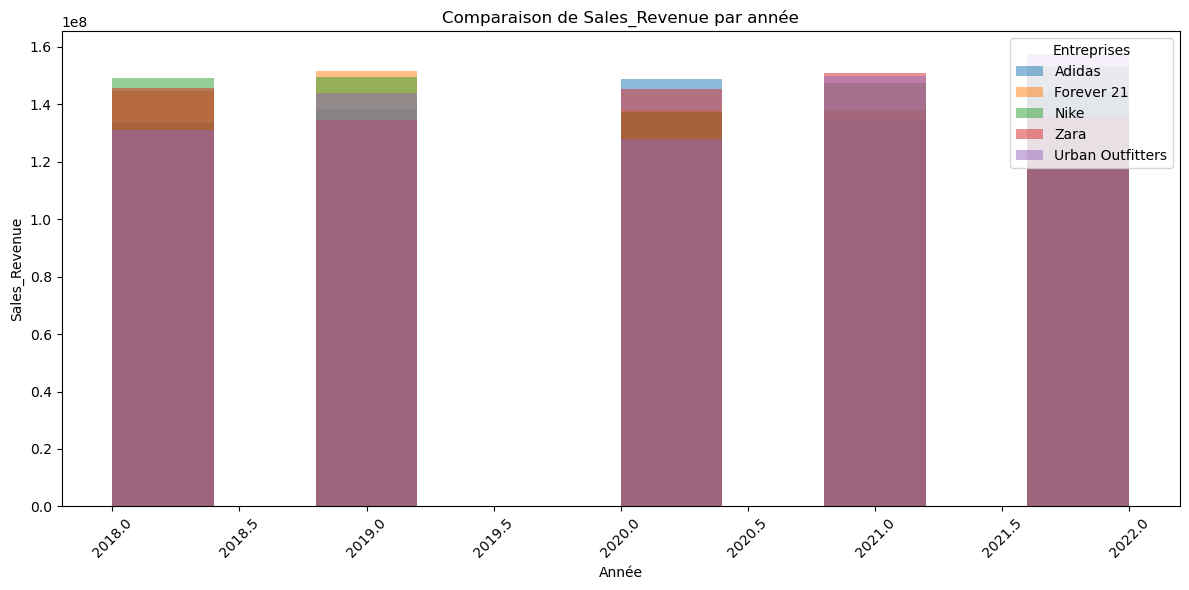

In [10]:
# Appel de la fonction pour tracer les histogrammes
graphs= plot_comparative_histograms(df_sorted, time_column='Production_Year', company_column='Company', numeric_columns=numeric_columns)

In [18]:


# Fonction pour créer des camemberts représentant la part moyenne de chaque entreprise
def plot_pie_charts(df, company_column, numeric_columns, date_column):
    # Convertir la colonne de date en type datetime
    df[date_column] = pd.to_datetime(df[date_column])
    
    # Obtenir l'année la plus récente
    latest_year = df[date_column].dt.year.max()
    
    # Filtrer le DataFrame pour ne garder que les données de la dernière année
    df_latest = df[df[date_column].dt.year == latest_year]
    
    # Obtenir les entreprises uniques
    companies = df_latest[company_column].unique()
    
    for col in numeric_columns:
        # Calculer la moyenne pour chaque entreprise pour la colonne donnée
        sum_company = df_latest.groupby(company_column)[col].sum()

        # Tracer le camembert
        plt.figure(figsize=(8, 8))
        plt.pie(sum_company, labels=sum_company.index, autopct='%1.1f%%', startangle=140)
        plt.title(f"Part de chaque entreprise pour {col} sur l'annee ({latest_year})")
        plt.axis('equal')  # Pour un cercle parfait
        plt.show()


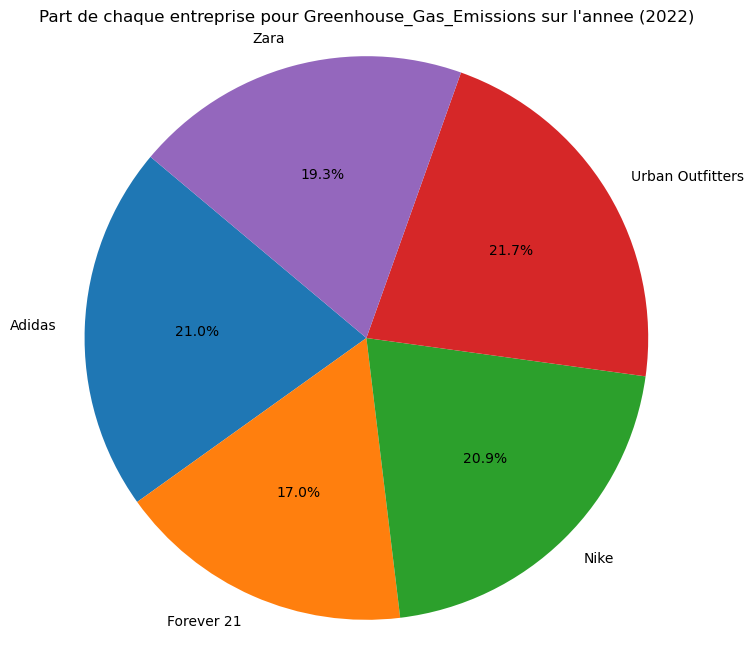

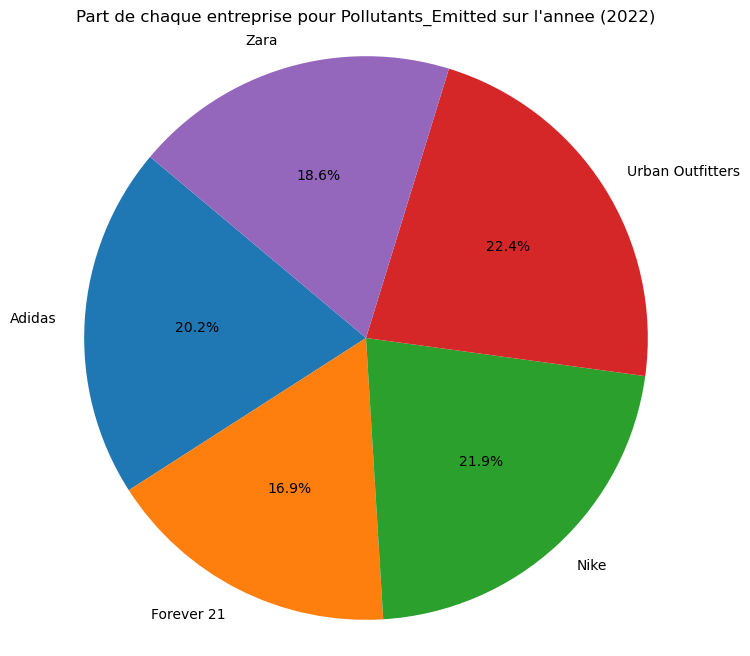

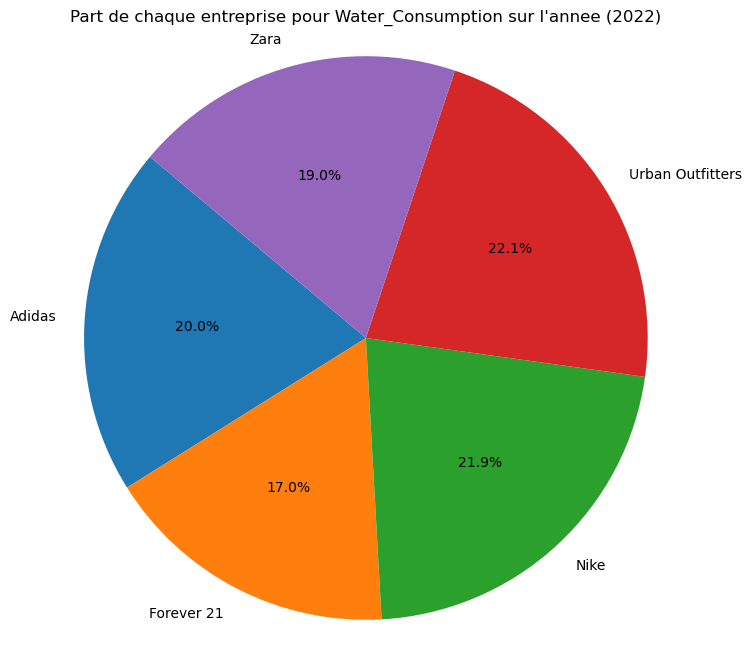

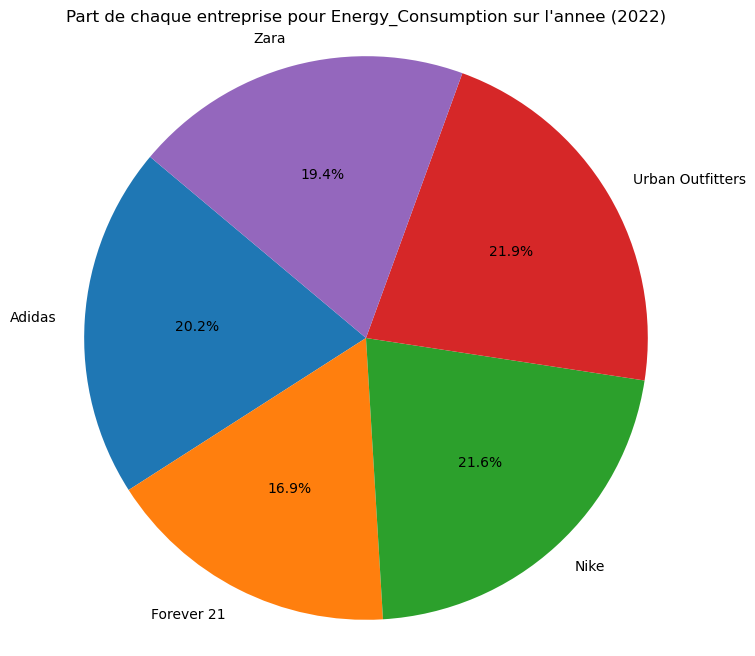

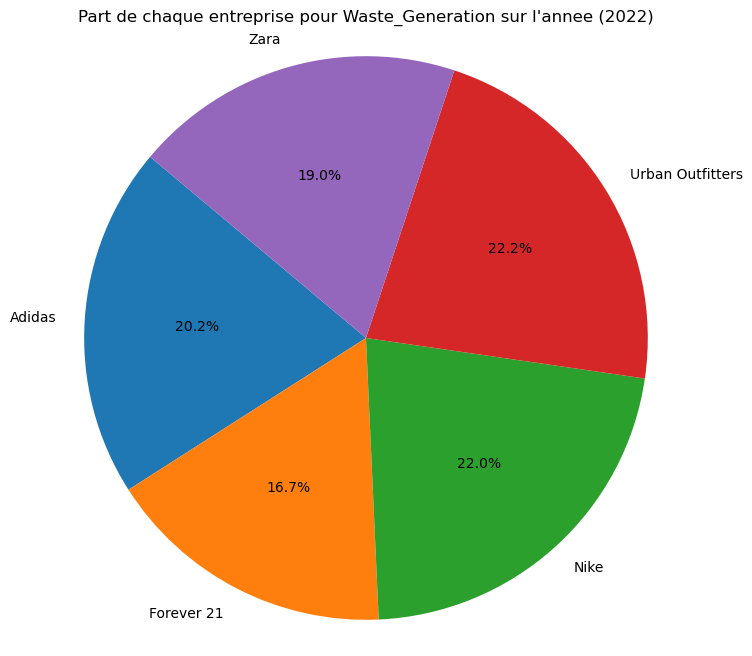

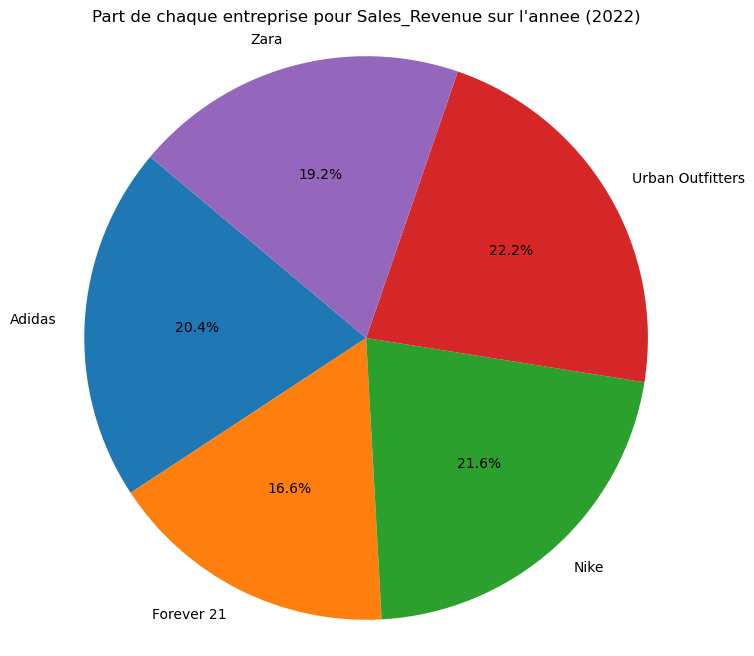

In [17]:
plot_pie_charts(df_sorted, company_column='Company', numeric_columns=numeric_columns, date_column="Production_Year")


In [21]:
# Fonction pour créer des camemberts représentant la répartition des données pour Zara
def plot_zara_pie_charts(df):
    # Filtrer le DataFrame pour ne garder que les données de Zara
    df_zara = df[df['Company'] == 'Zara']
    
    # Liste des colonnes numériques
    numeric_columns = ['Greenhouse_Gas_Emissions', 'Pollutants_Emitted', 
                       'Water_Consumption', 'Energy_Consumption', 
                       'Waste_Generation', 'Sales_Revenue']
    
    # Boucle pour chaque colonne numérique
    for col in numeric_columns:
        # Vérifier si la colonne existe dans le DataFrame
        if col in df_zara.columns:
            # Calculer la moyenne pour chaque type de produit pour la colonne donnée
            sum_product = df_zara.groupby('Product_Type')[col].sum()

            # Tracer le camembert
            plt.figure(figsize=(8, 8))
            plt.pie(sum_product, labels=sum_product.index, autopct='%1.1f%%', startangle=140)
            plt.title(f'Répartition pour Zara pour {col}')
            plt.axis('equal')  # Pour un cercle parfait
            plt.show()
        else:
            print(f"La colonne '{col}' n'existe pas dans le DataFrame.")


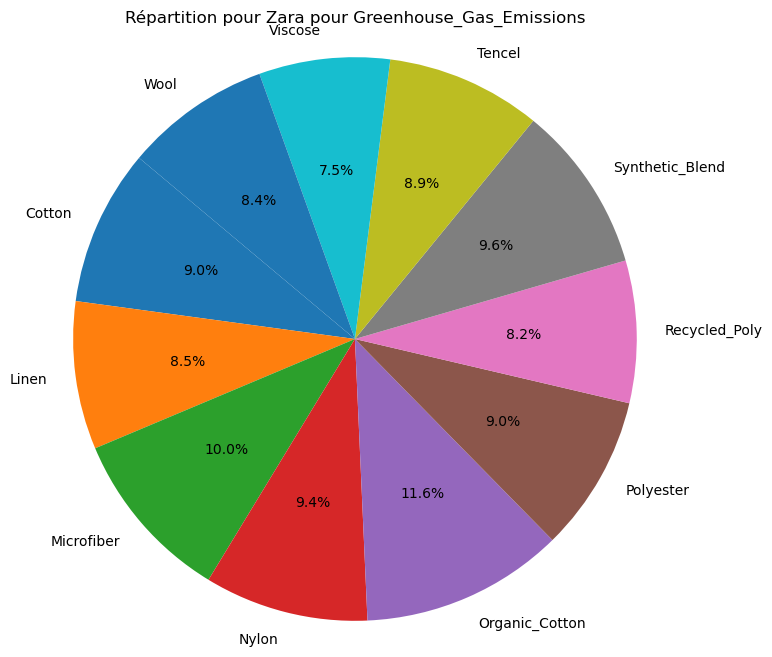

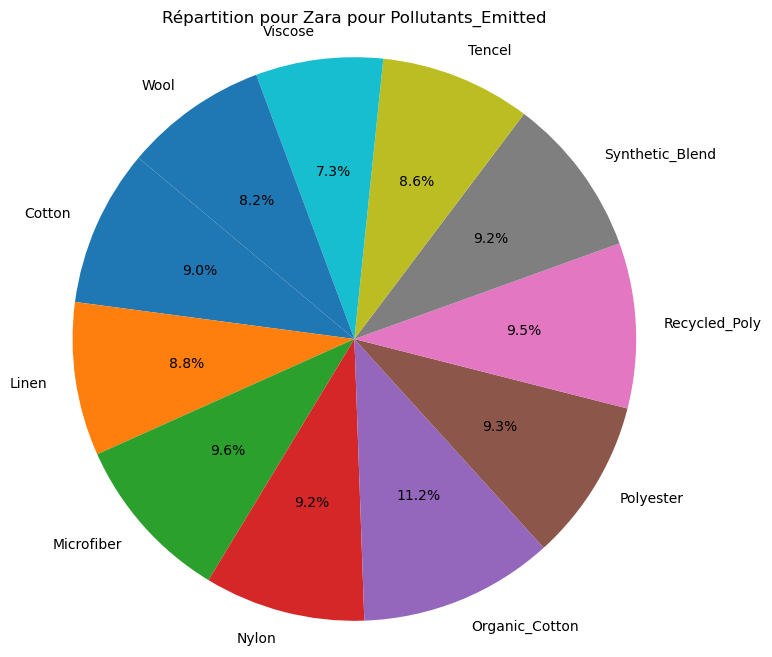

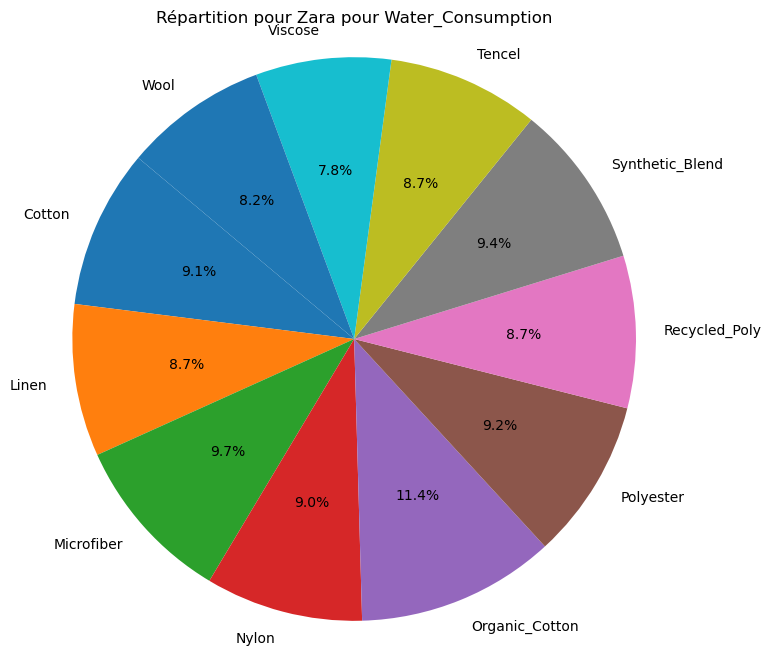

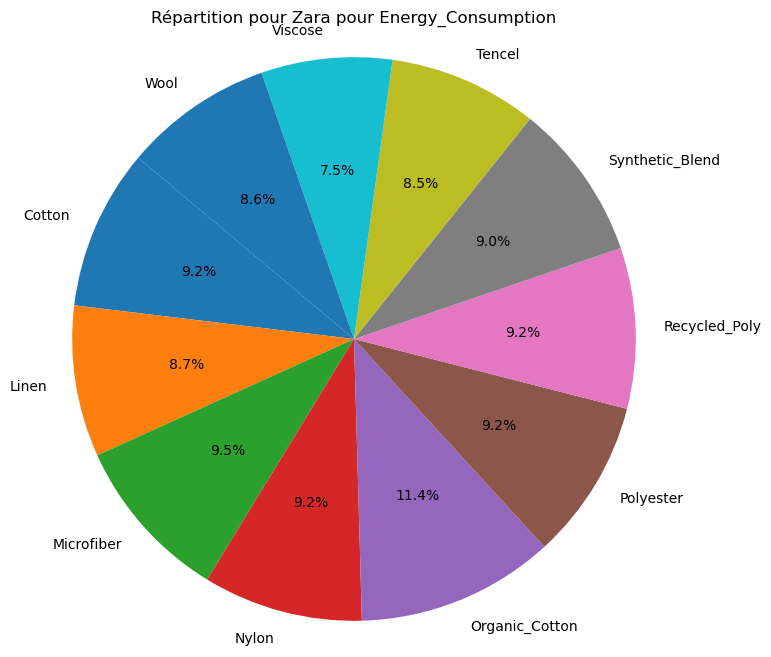

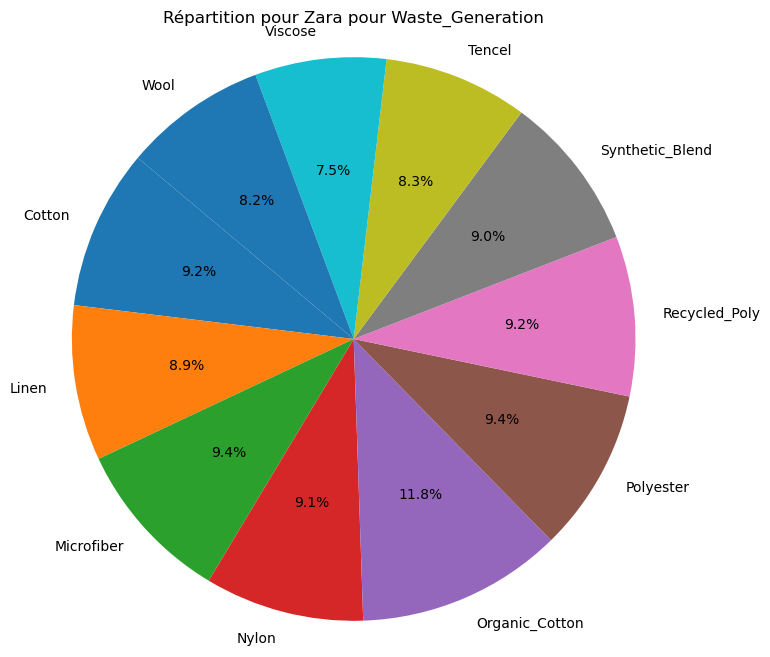

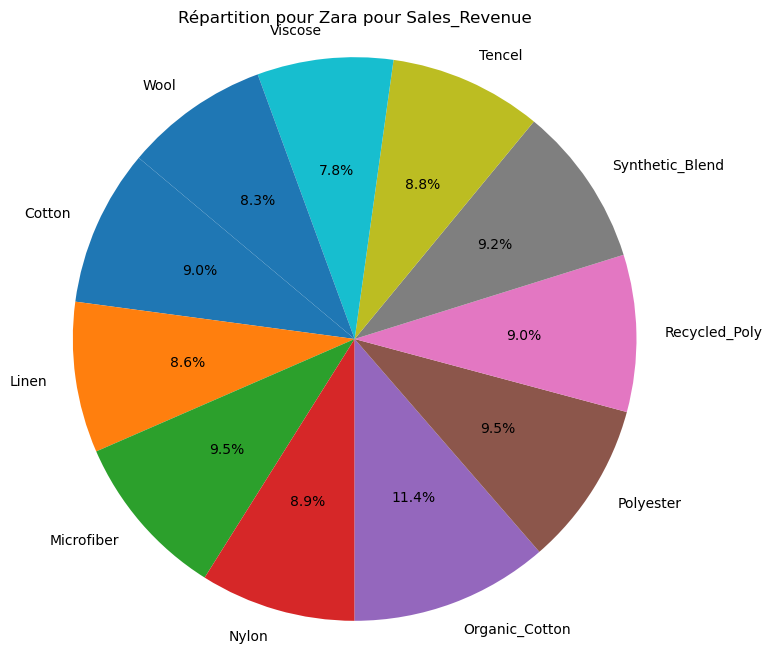

In [22]:
plot_zara_pie_charts(df_sorted)

In [32]:
def analyze_sales_vs_emissions_2022(df):
    # Filtrer pour l'année 2022
    df["Production_Year"] = pd.to_datetime(df["Production_Year"])
    
    # Obtenir l'année la plus récente
    latest_year = df["Production_Year"].dt.year.max()
    
    # Filtrer le DataFrame pour ne garder que les données de la dernière année
    df_latest = df[df["Production_Year"].dt.year == latest_year]
    
    # Grouper par entreprise et calculer la somme des revenus et des émissions de GES
    grouped = df_latest.groupby('Company').agg({
        'Sales_Revenue': 'sum',
        'Greenhouse_Gas_Emissions': 'sum'
    }).reset_index()
    
    # Vérifier qu'il y a des données suffisantes pour l'analyse
    if grouped.empty:
        print("Aucune donnée disponible pour l'année 2022.")
        return
    
    # Calcul de la corrélation entre revenus et émissions
    correlation = grouped['Sales_Revenue'].corr(grouped['Greenhouse_Gas_Emissions'])
    print(f"Corrélation entre Sales Revenue et Greenhouse Gas Emissions (2022) : {correlation:.2f}")
    
    # Visualisation avec un nuage de points et une régression linéaire
    plt.figure(figsize=(8, 6))
    sns.regplot(
        x='Sales_Revenue', 
        y='Greenhouse_Gas_Emissions', 
        data=grouped, 
        scatter_kws={'alpha': 0.7}
    )
    plt.title("Relation entre Sales Revenue et Greenhouse Gas Emissions (2022)")
    plt.xlabel("Sales Revenue")
    plt.ylabel("Greenhouse Gas Emissions")
    plt.grid(True)
    plt.show()
    
    # Ajustement d'une régression linéaire et affichage des statistiques
    slope, intercept, r_value, p_value, std_err = linregress(
        grouped['Sales_Revenue'], grouped['Greenhouse_Gas_Emissions']
    )
    print(f"Régression linéaire : y = {slope:.2f}x + {intercept:.2f}")
    print(f"Coefficient de détermination (R²) : {r_value**2:.2f}")
    print(f"Valeur p : {p_value:.4f}")



Corrélation entre Sales Revenue et Greenhouse Gas Emissions (2022) : 0.97


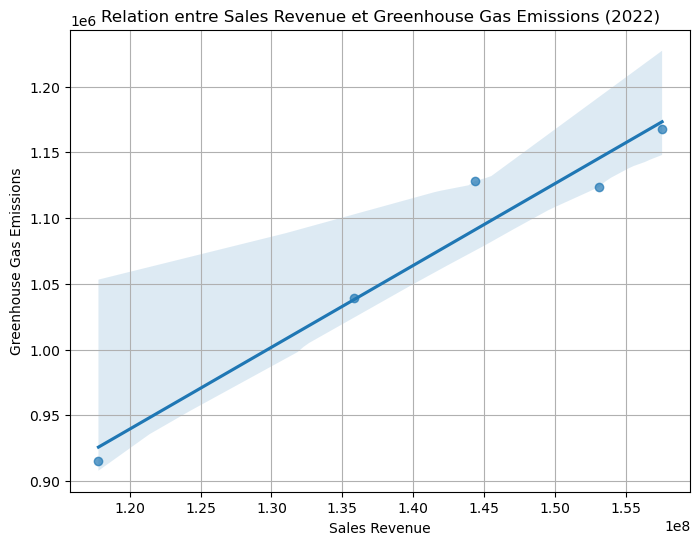

Régression linéaire : y = 0.01x + 192939.87
Coefficient de détermination (R²) : 0.95
Valeur p : 0.0048


In [33]:
analyze_sales_vs_emissions_2022(df)